In [ ]:

## Load packages
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


#### Get raw data

## Set working directory
#! Change to your working directory here !#
os.chdir('/content/sample_data/chicago/')

## Load in each file
column_names = ['X1', 'ID', 'Case Number' ,'Date', 'Block',
'IUCR', 'Primary Type', 'Description', 'Location Description',
'Arrest', 'Domestic', 'Beat', 'District', 'Ward',
'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
'Updated On', 'Latitude', 'Longitude', 'Location']

df1 = pd.read_csv('/content/sample_data/chicago/Chicago_Crimes_2001_to_2004.csv', encoding='utf-8', names=column_names, skiprows=1)
df2 = pd.read_csv('/content/sample_data/chicago/Chicago_Crimes_2005_to_2007.csv', encoding='utf-8', names=column_names, skiprows=1)
df3 = pd.read_csv('/content/sample_data/chicago/Chicago_Crimes_2008_to_2011.csv', encoding='utf-8', names=column_names, skiprows=1)
df4 = pd.read_csv('/content/sample_data/chicago/Chicago_Crimes_2012_to_2017.csv', encoding='utf-8', names=column_names, skiprows=1)

## Bind rows
df = pd.concat([df1, df2, df3, df4])
del df1, df2, df3, df4


ParserError: Error tokenizing data. C error: Expected 23 fields in line 1149094, saw 41


In [ ]:
# prompt: df

import pandas as pd

# Assuming combined_df from the previous code is available

# Display the dataframe (if it exists)
if 'combined_df' in locals():
  print(combined_df)
else:
  print("combined_df is not defined. Please run the previous code block first.")

(16797, 23)
   Unnamed: 0       ID Case Number                    Date  \
0           0  4673626    HM274058  04/02/2006 01:00:00 PM   
1           1  4673627    HM202199  02/26/2006 01:40:48 PM   
2           2  4673628    HM113861  01/08/2006 11:16:00 PM   
3           4  4673629    HM274049  04/05/2006 06:45:00 PM   
4           5  4673630    HM187120  02/17/2006 09:03:14 PM   

                 Block  IUCR   Primary Type                   Description  \
0    055XX N MANGO AVE  2825  OTHER OFFENSE       HARASSMENT BY TELEPHONE   
1   065XX S RHODES AVE  2017      NARCOTICS            MANU/DELIVER:CRACK   
2      013XX E 69TH ST  051A        ASSAULT           AGGRAVATED: HANDGUN   
3  061XX W NEWPORT AVE  0460        BATTERY                        SIMPLE   
4      037XX W 60TH ST  1811      NARCOTICS  POSS: CANNABIS 30GMS OR LESS   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False  ...  45.0            11.0        26   
1         

In [ ]:
# prompt: select count * from df

print(len(df))

314288


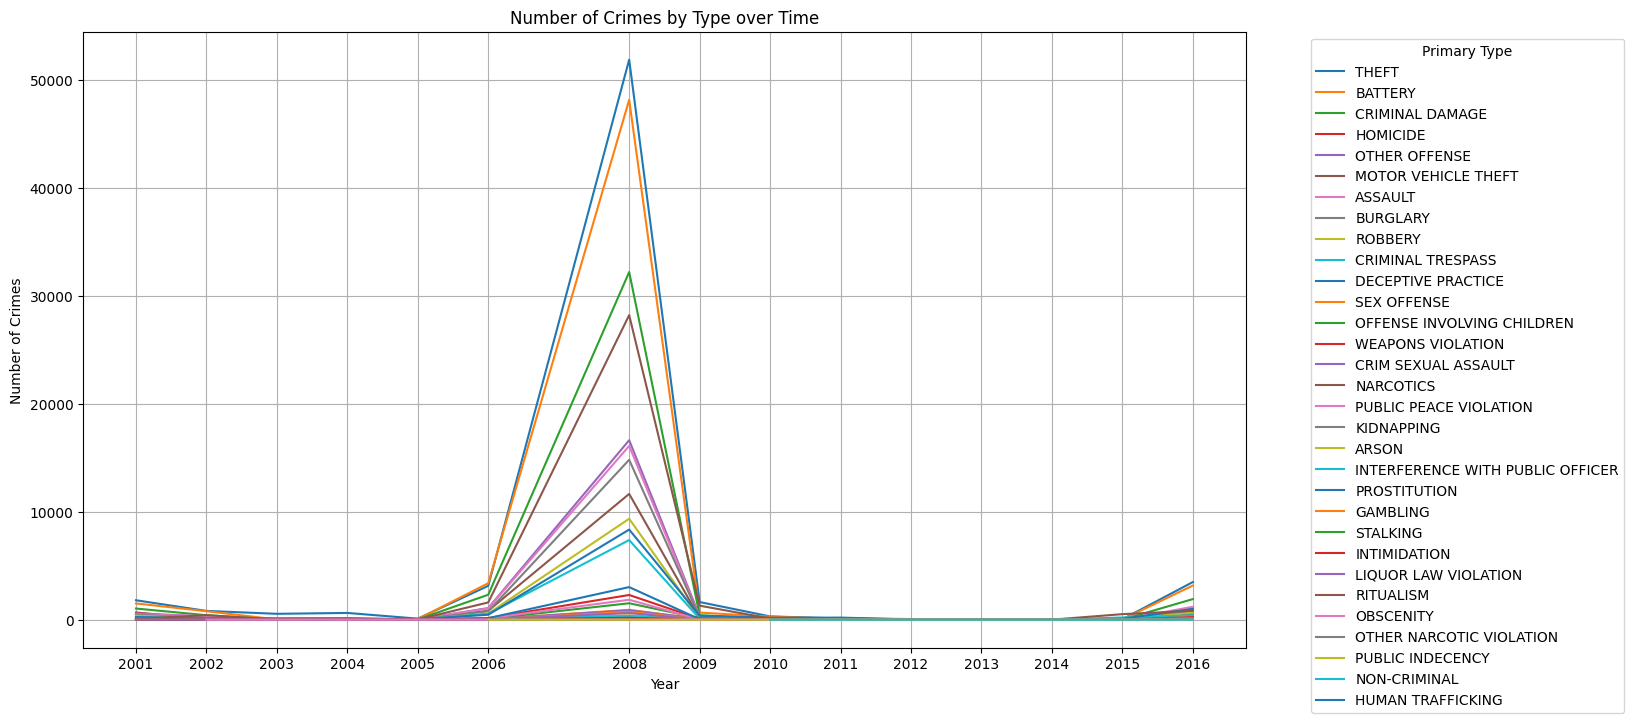

In [ ]:
# prompt: line graph  select  year(date),  primary_type,count(*) from df group by 1,2 order by year,count(*) desc

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Group data and count occurrences
crime_counts = df.groupby(['Year', 'Primary Type']).size().reset_index(name='counts')

# Sort by year and counts
crime_counts = crime_counts.sort_values(['Year', 'counts'], ascending=[True, False])

# Plotting
plt.figure(figsize=(15, 8))

for crime_type in crime_counts['Primary Type'].unique():
    crime_data = crime_counts[crime_counts['Primary Type'] == crime_type]
    plt.plot(crime_data['Year'], crime_data['counts'], label=crime_type)

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Type over Time')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)
plt.xticks(crime_counts['Year'].unique())
plt.show()

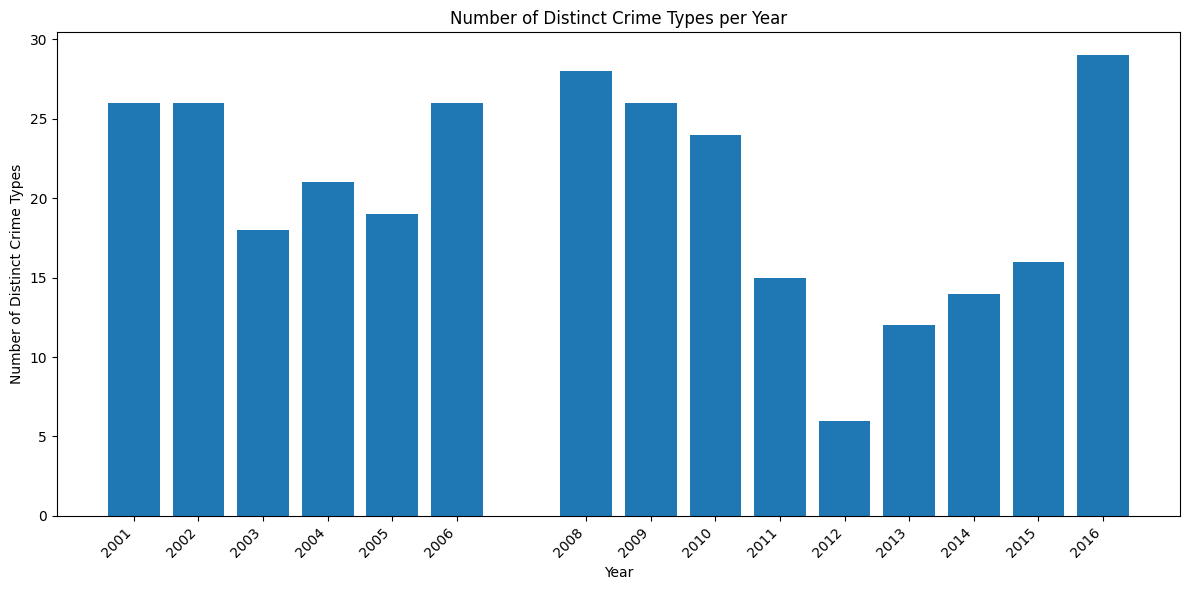

In [ ]:
# prompt: bar graph select  year(date),  count( distinct primary_type) from df group by 1 order by count(*) desc

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Date' column and 'Primary Type' column
# and the 'Date' column is already in datetime format.

# Group by year and count distinct primary crime types
crime_counts_by_year = df.groupby(df['Date'].dt.year)['Primary Type'].nunique().reset_index(name='Distinct_Crime_Types')

# Sort by count in descending order
crime_counts_by_year = crime_counts_by_year.sort_values('Distinct_Crime_Types', ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(crime_counts_by_year['Date'], crime_counts_by_year['Distinct_Crime_Types'])
plt.xlabel('Year')
plt.ylabel('Number of Distinct Crime Types')
plt.title('Number of Distinct Crime Types per Year')
plt.xticks(crime_counts_by_year['Date'], rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-70-d71f9ff87c6c>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(primary_type_counts)) # You can change the colormap


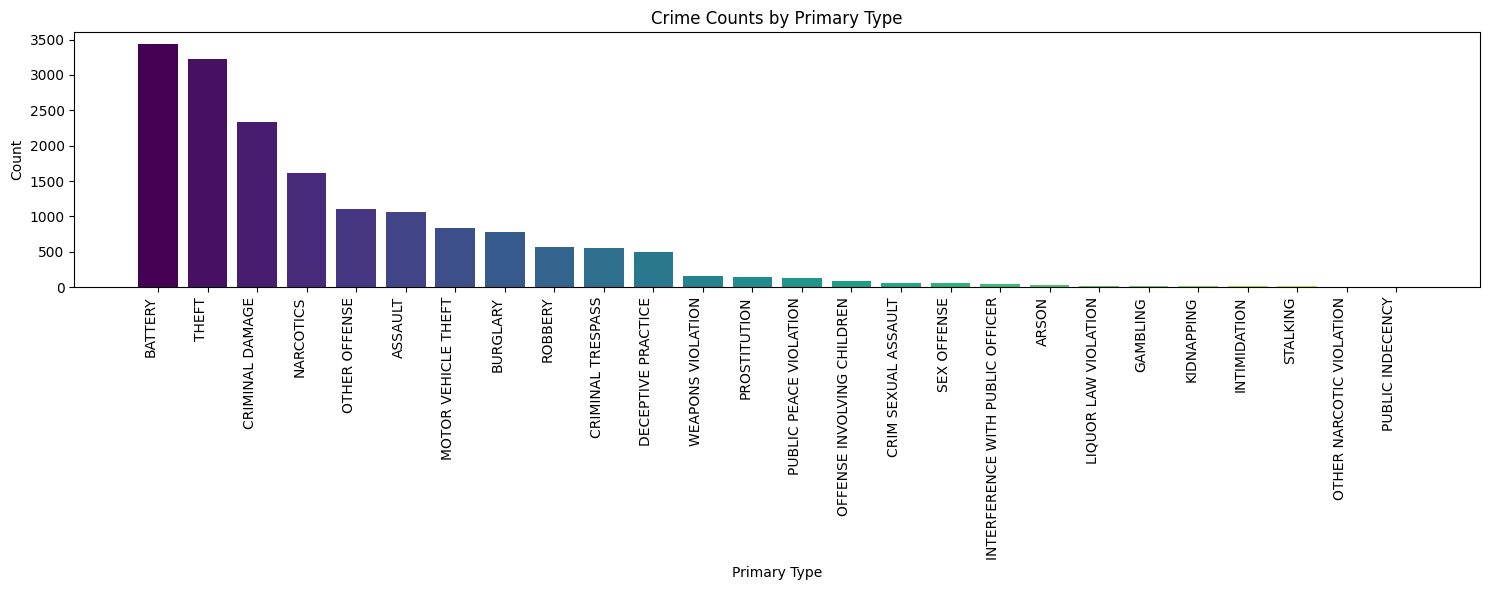

In [ ]:
# prompt: bar graph with different colors x axis= primary_type ,count * from df  order by count(*) desc

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Primary Type' column.
# Replace 'df' with your actual DataFrame name if different.

# Group by 'Primary Type' and count occurrences
primary_type_counts = df.groupby('Primary Type').size().reset_index(name='counts')

# Sort by counts in descending order
primary_type_counts = primary_type_counts.sort_values('counts', ascending=False)

# Create the bar graph with custom colors
plt.figure(figsize=(15, 6))  # Adjust figure size as needed

# Define a colormap (or a list of colors)
colors = plt.cm.get_cmap('viridis', len(primary_type_counts)) # You can change the colormap

plt.bar(primary_type_counts['Primary Type'], primary_type_counts['counts'], color=colors(range(len(primary_type_counts))))


plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Crime Counts by Primary Type')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-97-7cb4b4ac844b>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


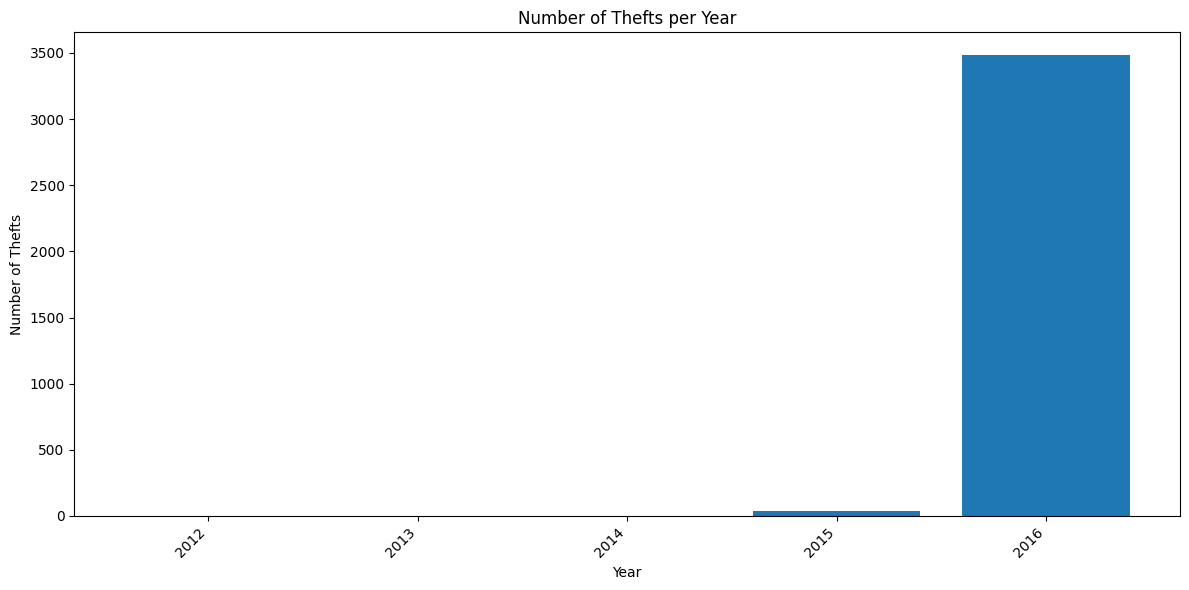

In [ ]:
# prompt: bar graph x axis year(date), y axis primary_type = 'theft' from df

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'Date' and 'Primary Type' columns.
# Convert 'Date' to datetime if it's not already:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter for 'theft' primary type
theft_df = df[df['Primary Type'] == 'THEFT']

# Group by year and count thefts
theft_counts_by_year = theft_df.groupby(theft_df['Date'].dt.year).size().reset_index(name='Theft_Counts')

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(theft_counts_by_year['Date'], theft_counts_by_year['Theft_Counts'])
plt.xlabel('Year')
plt.ylabel('Number of Thefts')
plt.title('Number of Thefts per Year')
plt.xticks(theft_counts_by_year['Date'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: distinct year(date) from df

# Assuming 'df' is your DataFrame and it has a 'Date' column.
distinct_years = df['Date'].dt.year.unique()
distinct_years

AttributeError: Can only use .dt accessor with datetimelike values